In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/boston.csv')
df.shape

(506, 14)

In [6]:
# displaying the top 5 rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
# Displaying the statisical features of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# Getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
# Checking for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
# Checking for unique values in the dataframe
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

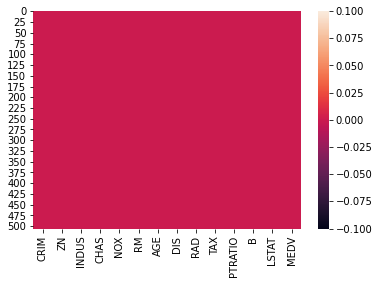

In [11]:
# HeatMap for NULL values in the dataset
sns.heatmap(df.isnull())

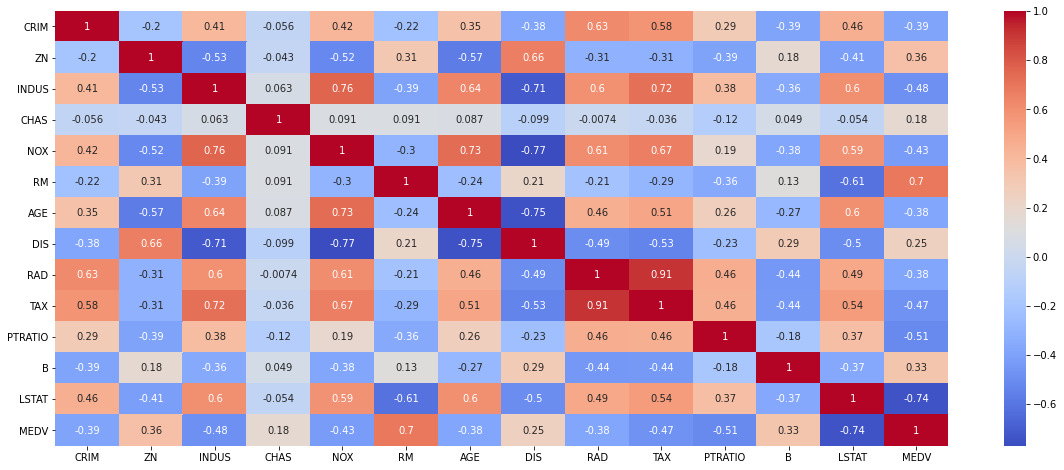

In [12]:
# Plotting the correlation heatmap
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [13]:
# Unstacking the correlation values
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[14:28:2]

RAD    TAX      0.910228
NOX    DIS      0.769230
INDUS  NOX      0.763651
AGE    DIS      0.747881
LSTAT  MEDV     0.737663
AGE    NOX      0.731470
TAX    INDUS    0.720760
dtype: float64

In [14]:
# Min - Max Normalization
cols = ['CRIM', 'ZN', 'TAX', 'B']
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum)/ (maximum - minimum)

In [15]:
# Dropping 'MEDV' from the DataFrame
X = df.drop(columns=['MEDV'], axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,2.31,0,0.538,6.575,65.2,4.0900,1,0.208015,15.3,1.000000,4.98
1,0.000236,0.00,7.07,0,0.469,6.421,78.9,4.9671,2,0.104962,17.8,1.000000,9.14
2,0.000236,0.00,7.07,0,0.469,7.185,61.1,4.9671,2,0.104962,17.8,0.989737,4.03
3,0.000293,0.00,2.18,0,0.458,6.998,45.8,6.0622,3,0.066794,18.7,0.994276,2.94
4,0.000705,0.00,2.18,0,0.458,7.147,54.2,6.0622,3,0.066794,18.7,1.000000,5.33


In [16]:
y = df['MEDV']

# Linear Regression

In [17]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

In [20]:
# Creating the Linear Regression Model
lin_reg = LinearRegression()

In [22]:
# Training the Model
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Predicting Values
pred_test = lin_reg.predict(X_test)

In [28]:
# Evaluation Matrix (Mean Squared error)
Eval_Matrix = np.sqrt(mean_squared_error(y_test, pred_test))
print(Eval_Matrix)

4.9286021826653394


In [32]:
# save the model to disk
filename = 'Boston_house_price_predictor.sav'
pickle.dump(lin_reg, open(filename, 'wb'))